<a href="https://colab.research.google.com/github/gsowndarya/ChatGPT-NLP/blob/main/chatgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Libraries**

In [ ]:
pip install contractions==0.1.73

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 6.9 MB/s eta 0:00:00


In [ ]:
!pip install vaderSentiment==3.3.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y numpy scipy gensim tensorflow

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: scipy 1.15.3
Uninstalling scipy-1.15.3:
  Successfully uninstalled scipy-1.15.3
Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0


In [ ]:
!pip install numpy==1.23.5 scipy==1.10.1 gensim==4.3.1 tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 51.6 MB/s eta 0:00:00
   ━━

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import contractions

from gensim.models import Word2Vec

import nltk
from nltk.corpus import stopwords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.utils.class_weight import compute_class_weight

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, GRU, GlobalAveragePooling1D, Conv1D

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Import data**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/chatgpt_reviews.csv')
df.head()

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2/15/2025,Impressive,Mother former community upon vote fact. Sure s...,2,ybass,68,78,Mobile,es,Canada,3.0,No
1,10/16/2024,Waste of Time,General paper understand main. Or age half won...,5,glenn33,71,193,Web,de,India,4.1,Yes
2,10/16/2024,Waste of Time,Here situation his high stage. Agree certainly...,4,debbie27,66,184,Web,hi,India,4.1,Yes
3,12/21/2024,Not Accurate,Rule court behind growth reality. Tonight whos...,1,hannahrussell,5,193,Web,fr,Canada,4.0,Yes
4,3/23/2025,Fantastic Experience,Case opportunity season road write. Effort gre...,3,cnorton,71,131,Web,hi,Australia,4.1,No


**Pre-processing**

In [ ]:
df.shape

(10000, 12)

In [ ]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
df.columns

Index(['date', 'title', 'review', 'rating', 'username', 'helpful_votes',
       'review_length', 'platform', 'language', 'location', 'version',
       'verified_purchase'],
      dtype='object')

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               10000 non-null  datetime64[ns]
 1   title              10000 non-null  object        
 2   review             10000 non-null  object        
 3   rating             10000 non-null  int64         
 4   username           10000 non-null  object        
 5   helpful_votes      10000 non-null  int64         
 6   review_length      10000 non-null  int64         
 7   platform           10000 non-null  object        
 8   language           10000 non-null  object        
 9   location           10000 non-null  object        
 10  version            10000 non-null  float64       
 11  verified_purchase  10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 937.6+ KB


In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Convert to lowercase
    text = str(text).lower()

    # Convert the txt expand
    text = contractions.fix(text)

    # Remove extra spaces
    text = re.sub(' +', ' ', text)

    # Remove text in square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove links
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # Remove newline characters
    text = re.sub(r'\n', '', text)

    # Remove punctuation
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)

    # Remove special characters and numbers (if any remain)
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Apply to the review column
df['clean_review'] = df['review'].apply(clean_text)

# View the cleaned reviews
df[['review', 'clean_review']].head()

,review,clean_review
0,Mother former community upon vote fact. Sure s...,mother former community upon vote fact sure st...
1,General paper understand main. Or age half won...,general paper understand main age half wonder ...
2,Here situation his high stage. Agree certainly...,situation high stage agree certainly blue thou...
3,Rule court behind growth reality. Tonight whos...,rule court behind growth reality tonight whose...
4,Case opportunity season road write. Effort gre...,case opportunity season road write effort gree...


In [ ]:
# Initialize analyzer
analyzer = SentimentIntensityAnalyzer()

# Define sentiment function
def get_vader_sentiment(review):
    scores = analyzer.polarity_scores(review)
    compound = scores['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply to the 'clean_review' column
df['sentiment'] = df['clean_review'].apply(get_vader_sentiment)

# Preview result
print(df[['clean_review', 'sentiment']].head())

                                        clean_review sentiment
0  mother former community upon vote fact sure st...  positive
1  general paper understand main age half wonder ...  positive
2  situation high stage agree certainly blue thou...  positive
3  rule court behind growth reality tonight whose...  positive
4  case opportunity season road write effort gree...  negative


In [ ]:
df["sentiment"].value_counts()

,count
sentiment,
positive,7079
negative,1859
neutral,1062


**Text Tokenization & Padding**

In [ ]:
# Parameters
max_words = 10000   # number of words to keep in the vocabulary
max_len = 100       # length of sequences

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")  # (Out Of Vocabulary)
tokenizer.fit_on_texts(df['clean_review'])

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(df['clean_review'])

# Pad sequences to ensure equal length
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

**Encode Labels**

In [ ]:
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['sentiment'])
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

{'negative': 0, 'neutral': 1, 'positive': 2}


In [ ]:
unique_labels, label_counts = np.unique(labels, return_counts=True)
print(unique_labels)
print(label_counts)

# old
# Negative - 0 - 1859
# Neutral - 1 - 1062
# Positive - 2 - 7079


[0 1 2]
[1859 1062 7079]


In [ ]:
padded

array([[161, 849, 773, ...,   0,   0,   0],
       [737, 695, 863, ...,   0,   0,   0],
       [721, 539, 577, ...,   0,   0,   0],
       ...,
       [496, 225, 123, ...,   0,   0,   0],
       [412, 686, 175, ...,   0,   0,   0],
       [148, 386, 798, ...,   0,   0,   0]], dtype=int32)

In [ ]:
labels

array([2, 2, 2, ..., 2, 2, 2])

**Train-Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

**Build the Model and train the Model**

**LSTM**

In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    LSTM(64, return_sequences=True),             # Processes word sequences
    Dropout(0.5),                                # Prevents overfitting
    LSTM(32),                                    # Summarizes the sequence
    Dense(3, activation='softmax')               # 3-class classification
])
model.compile(loss='sparse_categorical_crossentropy', # (not one-hot vectors)
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/5
250/250 [==============================] - 47s 158ms/step - loss: 0.8118 - accuracy: 0.7042 - val_loss: 0.7875 - val_accuracy: 0.7140
Epoch 2/5
250/250 [==============================] - 41s 163ms/step - loss: 0.7998 - accuracy: 0.7064 - val_loss: 0.7891 - val_accuracy: 0.7140
Epoch 3/5
250/250 [==============================] - 39s 157ms/step - loss: 0.7989 - accuracy: 0.7064 - val_loss: 0.7882 - val_accuracy: 0.7140
Epoch 4/5
250/250 [==============================] - 41s 166ms/step - loss: 0.7990 - accuracy: 0.7064 - val_loss: 0.7876 - val_accuracy: 0.7140
Epoch 5/5
250/250 [==============================] - 39s 157ms/step - loss: 0.8000 - accuracy: 0.7064 - val_loss: 0.7868 - val_accuracy: 0.7140


In [ ]:
early_stop = EarlyStopping(
    monitor='val_accuracy',   # You can also use 'val_loss'
    patience=3,           # Stop if no improvement after 3 epochs
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks=[early_stop],
    batch_size=32
)

Epoch 1/15
250/250 [==============================] - 38s 151ms/step - loss: 0.7990 - accuracy: 0.7064 - val_loss: 0.7879 - val_accuracy: 0.7140
Epoch 2/15
250/250 [==============================] - 39s 155ms/step - loss: 0.7990 - accuracy: 0.7064 - val_loss: 0.7869 - val_accuracy: 0.7140
Epoch 3/15
250/250 [==============================] - 40s 160ms/step - loss: 0.7984 - accuracy: 0.7064 - val_loss: 0.7892 - val_accuracy: 0.7140
Epoch 4/15
250/250 [==============================] - 45s 181ms/step - loss: 0.7987 - accuracy: 0.7064 - val_loss: 0.7866 - val_accuracy: 0.7140




> **Bidirectional LSTM**



In [ ]:
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    Bidirectional(LSTM(128, return_sequences=True)),  # remembers information from every word in the sentence, not just the last one.
    Dropout(0.5),
    LSTM(64), # remembers the final summary of the whole sentence.
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax') # Output layer for 3-class classification
])

model.compile(
    loss='sparse_categorical_crossentropy',  # Since labels are 0, 1, 2
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks=[early_stop],
    batch_size=32)


Epoch 1/15
250/250 [==============================] - 178s 683ms/step - loss: 0.8181 - accuracy: 0.7053 - val_loss: 0.7914 - val_accuracy: 0.7140
Epoch 2/15
250/250 [==============================] - 154s 618ms/step - loss: 0.8093 - accuracy: 0.7064 - val_loss: 0.7913 - val_accuracy: 0.7140
Epoch 3/15
250/250 [==============================] - 159s 634ms/step - loss: 0.8049 - accuracy: 0.7064 - val_loss: 0.7884 - val_accuracy: 0.7140
Epoch 4/15
250/250 [==============================] - 154s 615ms/step - loss: 0.8057 - accuracy: 0.7064 - val_loss: 0.7927 - val_accuracy: 0.7140


**Class Weights**

In [ ]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),  # [0, 1, 2]
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 1.7813404586951682, 1: 3.1298904538341157, 2: 0.4718928803161682}

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)

Epoch 1/15
250/250 [==============================] - 160s 639ms/step - loss: 1.0996 - accuracy: 0.4306 - val_loss: 1.1107 - val_accuracy: 0.1810
Epoch 2/15
250/250 [==============================] - 158s 632ms/step - loss: 1.0992 - accuracy: 0.2905 - val_loss: 1.1090 - val_accuracy: 0.1810
Epoch 3/15
250/250 [==============================] - 162s 649ms/step - loss: 1.0990 - accuracy: 0.3234 - val_loss: 1.0986 - val_accuracy: 0.1810
Epoch 4/15
250/250 [==============================] - 163s 650ms/step - loss: 1.0999 - accuracy: 0.3111 - val_loss: 1.1064 - val_accuracy: 0.1050
Epoch 5/15
250/250 [==============================] - 162s 649ms/step - loss: 1.0991 - accuracy: 0.3877 - val_loss: 1.1172 - val_accuracy: 0.1050
Epoch 6/15
250/250 [==============================] - 165s 660ms/step - loss: 1.0990 - accuracy: 0.3483 - val_loss: 1.1004 - val_accuracy: 0.1050
Epoch 6: early stopping


**Word2Vec**

In [ ]:
# Convert reviews to text
texts = df['clean_review'].astype(str).tolist()

# Tokenize for Word2Vec
tokenized_reviews = [review.split() for review in texts]  # tokenized input

# Train Word2Vec (optional if you're not using pretrained embeddings)
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=128, window=5, min_count=2, workers=4)

# Tokenization for LSTM input
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index

# Padding
sequences = tokenizer.texts_to_sequences(texts)
max_len = int(np.percentile([len(seq) for seq in sequences], 99))
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

In [ ]:
max_len

28

In [ ]:
embedding_matrix = np.zeros((vocab_size, 128))
for word, i in tokenizer.word_index.items():
    if i < vocab_size and word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]


embedding_matrix.shape

(10000, 128)

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=128,
              weights=[embedding_matrix],    # use our pre-trained Word2Vec table
              input_length=100,
              trainable=False),              # don't change these word meanings
    LSTM(64),                                # trying to remember the emotion or meaning
    Dense(3, activation='softmax'),

])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 1.7813404586951682, 1: 3.1298904538341157, 2: 0.4718928803161682}

In [ ]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)

Epoch 1/15
250/250 [==============================] - 21s 74ms/step - loss: 1.0992 - accuracy: 0.3329 - val_loss: 1.1031 - val_accuracy: 0.1050
Epoch 2/15
250/250 [==============================] - 17s 69ms/step - loss: 1.0990 - accuracy: 0.2684 - val_loss: 1.0999 - val_accuracy: 0.1050
Epoch 3/15
250/250 [==============================] - 16s 65ms/step - loss: 1.0990 - accuracy: 0.2981 - val_loss: 1.0974 - val_accuracy: 0.1050
Epoch 4/15
250/250 [==============================] - 17s 69ms/step - loss: 1.0989 - accuracy: 0.1764 - val_loss: 1.0915 - val_accuracy: 0.7140
Epoch 5/15
250/250 [==============================] - 16s 64ms/step - loss: 1.0989 - accuracy: 0.2429 - val_loss: 1.0962 - val_accuracy: 0.1050
Epoch 6/15
250/250 [==============================] - 18s 72ms/step - loss: 1.0988 - accuracy: 0.3904 - val_loss: 1.0981 - val_accuracy: 0.1050
Epoch 7/15
250/250 [==============================] - 17s 69ms/step - loss: 1.0988 - accuracy: 0.1909 - val_loss: 1.0925 - val_accuracy:

In [ ]:
embedding_dim = embedding_matrix.shape[1]
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=100,
              trainable=False),
    GlobalAveragePooling1D(),          # averages all the word vectors
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32,
    callbacks=[early_stop],
    class_weight=class_weights_dict,
    verbose=1
)


Epoch 1/15
250/250 [==============================] - 2s 5ms/step - loss: 1.0969 - accuracy: 0.4674 - val_loss: 1.0915 - val_accuracy: 0.2560
Epoch 2/15
250/250 [==============================] - 1s 4ms/step - loss: 1.0911 - accuracy: 0.4929 - val_loss: 1.0661 - val_accuracy: 0.4025
Epoch 3/15
250/250 [==============================] - 1s 5ms/step - loss: 1.0854 - accuracy: 0.4877 - val_loss: 1.0738 - val_accuracy: 0.3285
Epoch 4/15
250/250 [==============================] - 1s 4ms/step - loss: 1.0800 - accuracy: 0.4294 - val_loss: 1.0973 - val_accuracy: 0.3310
Epoch 5/15
250/250 [==============================] - 1s 4ms/step - loss: 1.0756 - accuracy: 0.4695 - val_loss: 1.0586 - val_accuracy: 0.4970
Epoch 6/15
250/250 [==============================] - 2s 6ms/step - loss: 1.0728 - accuracy: 0.4256 - val_loss: 1.0854 - val_accuracy: 0.3995
Epoch 7/15
250/250 [==============================] - 1s 6ms/step - loss: 1.0698 - accuracy: 0.4683 - val_loss: 1.0868 - val_accuracy: 0.3310
Epoch 

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=15,
                    batch_size=64,
                    callbacks=[early_stop, checkpoint],
                    verbose=1)

Epoch 1/15
125/125 [==============================] - 2s 16ms/step - loss: 0.8214 - accuracy: 0.6930 - val_loss: 0.7900 - val_accuracy: 0.7140
Epoch 2/15
125/125 [==============================] - 1s 5ms/step - loss: 0.7870 - accuracy: 0.7065 - val_loss: 0.7887 - val_accuracy: 0.7140
Epoch 3/15
125/125 [==============================] - 1s 5ms/step - loss: 0.7864 - accuracy: 0.7065 - val_loss: 0.7878 - val_accuracy: 0.7140
Epoch 4/15
125/125 [==============================] - 1s 5ms/step - loss: 0.7860 - accuracy: 0.7063 - val_loss: 0.7869 - val_accuracy: 0.7140
Epoch 5/15
125/125 [==============================] - 1s 4ms/step - loss: 0.7856 - accuracy: 0.7063 - val_loss: 0.7864 - val_accuracy: 0.7140
Epoch 6/15
125/125 [==============================] - 1s 4ms/step - loss: 0.7851 - accuracy: 0.7063 - val_loss: 0.7857 - val_accuracy: 0.7140
Epoch 7/15
125/125 [==============================] - 1s 4ms/step - loss: 0.7851 - accuracy: 0.7063 - val_loss: 0.7853 - val_accuracy: 0.7140
Epoch

In [ ]:
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=100,
              trainable=False),
    Bidirectional(LSTM(128, return_sequences=True)),        # gives output for every word, not just the final one
    Dropout(0.2),
    GRU(64),                                               # Focuses on key information in the sentence
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=15,
                    batch_size=64,
                    callbacks=[early_stop, checkpoint],
                    verbose=1)

Epoch 1/15
125/125 [==============================] - 97s 725ms/step - loss: 0.8289 - accuracy: 0.7023 - val_loss: 0.7870 - val_accuracy: 0.7140
Epoch 2/15
125/125 [==============================] - 89s 706ms/step - loss: 0.8077 - accuracy: 0.7064 - val_loss: 0.7882 - val_accuracy: 0.7140
Epoch 3/15
125/125 [==============================] - 88s 703ms/step - loss: 0.8068 - accuracy: 0.7064 - val_loss: 0.7876 - val_accuracy: 0.7140
Epoch 4/15
125/125 [==============================] - 89s 710ms/step - loss: 0.8078 - accuracy: 0.7064 - val_loss: 0.7867 - val_accuracy: 0.7140
Epoch 5/15
125/125 [==============================] - 92s 738ms/step - loss: 0.8055 - accuracy: 0.7064 - val_loss: 0.7872 - val_accuracy: 0.7140
Epoch 6/15
125/125 [==============================] - 91s 732ms/step - loss: 0.8056 - accuracy: 0.7064 - val_loss: 0.7866 - val_accuracy: 0.7140
Epoch 7/15
125/125 [==============================] - 88s 705ms/step - loss: 0.8044 - accuracy: 0.7064 - val_loss: 0.7866 - val_ac

In [ ]:
embedding_dim = embedding_matrix.shape[1]
model = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=100,
              trainable=True),    # fine-tune the meanings
    GlobalAveragePooling1D(),     # averages all the word vectors
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)


history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/15
125/125 [==============================] - 4s 26ms/step - loss: 0.8236 - accuracy: 0.7064 - val_loss: 0.7760 - val_accuracy: 0.7140
Epoch 2/15
125/125 [==============================] - 3s 25ms/step - loss: 0.7678 - accuracy: 0.7064 - val_loss: 0.7495 - val_accuracy: 0.7140
Epoch 3/15
125/125 [==============================] - 4s 33ms/step - loss: 0.6916 - accuracy: 0.7084 - val_loss: 0.6387 - val_accuracy: 0.7170
Epoch 4/15
125/125 [==============================] - 3s 24ms/step - loss: 0.5045 - accuracy: 0.8005 - val_loss: 0.5086 - val_accuracy: 0.7785
Epoch 5/15
125/125 [==============================] - 3s 24ms/step - loss: 0.3725 - accuracy: 0.8686 - val_loss: 0.4160 - val_accuracy: 0.8525
Epoch 6/15
125/125 [==============================] - 3s 25ms/step - loss: 0.3025 - accuracy: 0.8950 - val_loss: 0.3850 - val_accuracy: 0.8600
Epoch 7/15
125/125 [==============================] - 5s 38ms/step - loss: 0.2566 - accuracy: 0.9165 - val_loss: 0.3707 - val_accuracy: 0.8665

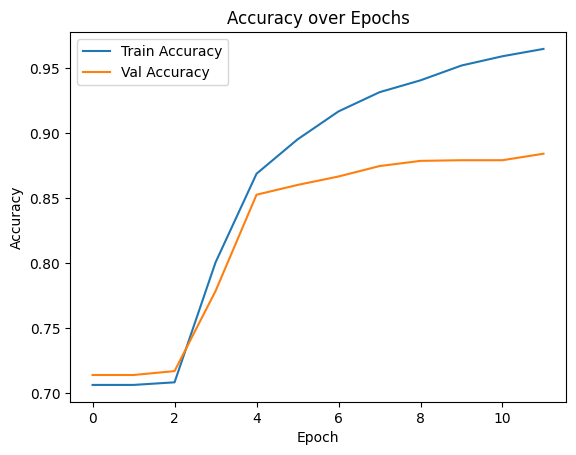

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**CNN (Convolutional Neural Network)**

In [ ]:
model_1 = Sequential([
    Embedding(input_dim=vocab_size,
              output_dim=embedding_dim,
              weights=[embedding_matrix],
              input_length=100,
              trainable=True),
    Conv1D(128, 5, activation='relu'),  # kernel size = 5
    GlobalAveragePooling1D(),           # Averages all patterns into 1 vector
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])
model_1.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model.h5', monitor='val_accuracy', save_best_only=True)


history = model_1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=64,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/15
125/125 [==============================] - 16s 122ms/step - loss: 0.8032 - accuracy: 0.7011 - val_loss: 0.7703 - val_accuracy: 0.7140
Epoch 2/15
125/125 [==============================] - 16s 125ms/step - loss: 0.7017 - accuracy: 0.7119 - val_loss: 0.5806 - val_accuracy: 0.7605
Epoch 3/15
125/125 [==============================] - 16s 129ms/step - loss: 0.4366 - accuracy: 0.8269 - val_loss: 0.4395 - val_accuracy: 0.8245
Epoch 4/15
125/125 [==============================] - 16s 126ms/step - loss: 0.3081 - accuracy: 0.8876 - val_loss: 0.4036 - val_accuracy: 0.8560
Epoch 5/15
125/125 [==============================] - 16s 124ms/step - loss: 0.2404 - accuracy: 0.9265 - val_loss: 0.4069 - val_accuracy: 0.8660
Epoch 6/15
125/125 [==============================] - 16s 126ms/step - loss: 0.1949 - accuracy: 0.9435 - val_loss: 0.3679 - val_accuracy: 0.8815
Epoch 7/15
125/125 [==============================] - 15s 121ms/step - loss: 0.1549 - accuracy: 0.9561 - val_loss: 0.3959 - val_ac

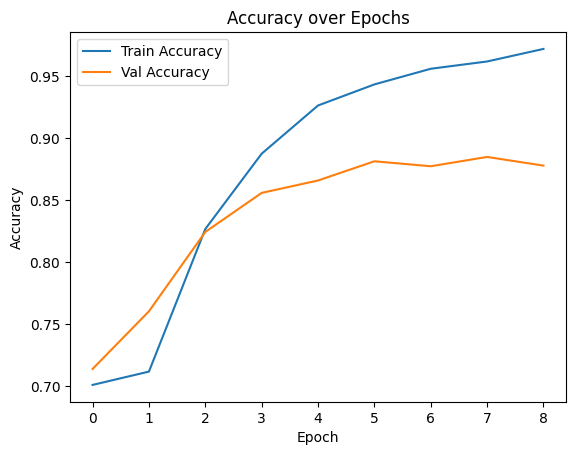

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Evaluate Final Model on Test Set**

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}")

63/63 [==============================] - 0s 3ms/step - loss: 0.3631 - accuracy: 0.8785
Final Test Accuracy: 0.8785


In [ ]:
# Predict class probabilities
y_pred_probs = model.predict(X_test)

# Get predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Neutral', 'Positive']))

63/63 [==============================] - 0s 4ms/step
Accuracy: 0.8785
Confusion Matrix:
[[ 305   23   34]
 [  56   96   58]
 [  46   26 1356]]
Classification Report:

              precision    recall  f1-score   support

    Negative       0.75      0.84      0.79       362
     Neutral       0.66      0.46      0.54       210
    Positive       0.94      0.95      0.94      1428

    accuracy                           0.88      2000
   macro avg       0.78      0.75      0.76      2000
weighted avg       0.87      0.88      0.87      2000



In [ ]:
loss, accuracy = model_1.evaluate(X_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}")

63/63 [==============================] - 1s 20ms/step - loss: 0.3679 - accuracy: 0.8815
Final Test Accuracy: 0.8815


In [ ]:
# Predict class probabilities
y_pred_probs_1 = model_1.predict(X_test)

# Get predicted class labels
y_pred_1 = np.argmax(y_pred_probs_1, axis=1)

accuracy = accuracy_score(y_test, y_pred_1)
print(f"Accuracy: {accuracy:.4f}")

# Print confusion matrix
conmat = confusion_matrix(y_test, y_pred_1)
print("Confusion Matrix:")
print(conmat)

print("Classification Report:\n")
print(classification_report(y_test, y_pred_1, target_names=['Negative', 'Neutral', 'Positive']))

63/63 [==============================] - 1s 12ms/step
Accuracy: 0.8815
Confusion Matrix:
[[ 295   12   55]
 [  34  122   54]
 [  61   21 1346]]
Classification Report:

              precision    recall  f1-score   support

    Negative       0.76      0.81      0.78       362
     Neutral       0.79      0.58      0.67       210
    Positive       0.93      0.94      0.93      1428

    accuracy                           0.88      2000
   macro avg       0.82      0.78      0.80      2000
weighted avg       0.88      0.88      0.88      2000



**Save and Load the Model**

In [ ]:
# Save the model
model.save("best_model.h5") # HDF5 (Hierarchical Data Format version 5)

# Download the model to your local machine
from google.colab import files
files.download("best_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Save tokenizer to a file
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)

# Download the model to your local machine
files.download('tokenizer.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Reload and use it**

In [ ]:
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

In [ ]:
from tensorflow.keras.models import load_model
best_model = load_model("best_model.h5")

In [ ]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()
    text = contractions.fix(text)
    text = re.sub(' +', ' ', text)
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)


In [ ]:
def predict_sentiment(text):
    cleaned = clean_text(text)
    seq = tokenizer.texts_to_sequences([cleaned])
    padded = pad_sequences(seq, maxlen=max_len, padding='post')
    pred = model.predict(padded)
    label = np.argmax(pred, axis=1)[0]
    label_map = {0: 'Negative 😞', 1: 'Neutral 😐', 2: 'Positive 😊'}
    return label_map[label]

In [ ]:
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'Positive 😊'
    elif compound <= -0.05:
        return 'Negative 😞'
    else:
        return 'Neutral 😐'

In [ ]:
new_text = "ChatGPT is helpful"
print(predict_sentiment(new_text))

1/1 [==============================] - 0s 75ms/step
Neutral 😐


In [ ]:
sample = "ChatGPT is helpful"

print("Your Text:", sample)
print("Deep Learning Model Prediction:", predict_sentiment(sample))
print("VADER Sentiment:", get_vader_sentiment(sample))

Your Text: ChatGPT is helpful
1/1 [==============================] - 0s 26ms/step
Deep Learning Model Prediction: Neutral 😐
VADER Sentiment: Positive 😊


In [ ]:
sample = "This is the best AI I've ever used!"

print("Your Text:", sample)
print("Deep Learning Model Prediction:", predict_sentiment(sample))
print("VADER Sentiment:", get_vader_sentiment(sample))

Your Text: This is the best AI I've ever used!
1/1 [==============================] - 0s 40ms/step
Deep Learning Model Prediction: Positive 😊
VADER Sentiment: Positive 😊


In [ ]:
sample = "ChatGPT is not helpful at all, gives wrong answers."

print("Your Text:", sample)
print("Deep Learning Model Prediction:", predict_sentiment(sample))
print("VADER Sentiment:", get_vader_sentiment(sample))


Your Text: ChatGPT is not helpful at all, gives wrong answers.
1/1 [==============================] - 0s 27ms/step
Deep Learning Model Prediction: Negative 😞
VADER Sentiment: Negative 😞
